In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


# **Download data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Fake_news_classifier/

/content/drive/MyDrive/Fake_news_classifier


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (13).json


{'kaggle.json': b'{"username":"bassantelkafash","key":"c5019db7d84d7b7dbe794be2462926c5"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c fake-news 

fake-news.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/drive/MyDrive/Fake_news_classifier/fake-news.zip

Archive:  /content/drive/MyDrive/Fake_news_classifier/fake-news.zip
replace submit.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: submit.csv              
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


# **Explore data**

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Fake_news_classifier/train.csv')

In [5]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


# **Handling missing values**

In [53]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [54]:
data = data.fillna(' ')

In [55]:
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [58]:
X = data['text']
Y = data['label']

In [ ]:
X[:20]

0     House Dem Aide: We Didn’t Even See Comey’s Let...
1     Ever get the feeling your life circles the rou...
2     Why the Truth Might Get You Fired October 29, ...
3     Videos 15 Civilians Killed In Single US Airstr...
4     Print \nAn Iranian woman has been sentenced to...
5     In these trying times, Jackie Mason is the Voi...
6     Ever wonder how Britain’s most iconic pop pian...
7     PARIS  —   France chose an idealistic, traditi...
8     Donald J. Trump is scheduled to make a highly ...
9     A week before Michael T. Flynn resigned as nat...
10    Organizing for Action, the activist group that...
11    The BBC produced spoof on the “Real Housewives...
12    The mystery surrounding The Third Reich and Na...
13    Clinton Campaign Demands FBI Affirm Trump's Ru...
14    Yes, There Are Paid Government Trolls On Socia...
15    Guillermo Barros Schelotto was not the first A...
16    The scandal engulfing Wells Fargo toppled its ...
17    A Caddo Nation tribal leader has just been

# **Pre-Processing**

In [ ]:
X[12050]


"What Keeps the F-35 Alive   David Swanson \nImagine if a local business in your town invented a brand new tool that was intended to have an almost magical effect thousands of miles away. However, where the tool was kept and used locally became an area unsafe for children. Children who got near this tool tended to have increased blood pressure and increased stress hormones, lower reading skills, poorer memories, impaired auditory and speech perception, and impaired academic performance. \nMost of us would find this situation at least a little concerning, unless the new invention was designed to murder lots of people. Then it'd be just fine. \nNow, imagine if this same new tool ruined neighborhoods because people couldn't safely live near it. Imagine if the government had to compensate people but kick them out of living near the location of this tool. Again, I think, we might find that troubling if mass murder were not the mission. \nImagine also that this tool fairly frequently explode

In [ ]:
Y[12050]

1

In [12]:
import nltk 
import re

from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
class data_preprocessing :

  def clean_text(self,text):

    text=re.sub(r'#\S*','',text)  #  remove hashtag
    text=re.sub(r'@\S*','',text)  # remove user name 
    text=re.sub(r'https?:\/\/\S+','',text)  #remove hyperlinks
    text=re.sub('\d+','',text)  # remove digits
    text=re.sub(r'\W',' ',text) # remove emotions
    text=re.sub(r'^\s+','',text)  # remove space in front of text 
    text=re.sub(r'\s+$','',text)  # remove space in tail text

    return text

  def to_lower_case(self,text) :

    text = [x.lower() for x in text]
    text = ''.join(text)

    return text

  def tokenization(self, text):

    tokens = re.split( '\W+', text )

    return tokens   

  def remove_stopwords(self, text ):

    output = [ i for i in text if i not in stopwords ]

    return output  

  def stem_text(self, text ):

     ps = PorterStemmer()

     text = [ ps.stem( word ) for word in text ]
     
     return text 

  def text_preprocessing(self, text):

    test = self.clean_text(text)
    test = self.to_lower_case(test)
    test = self.tokenization(test)
    test = self.remove_stopwords(test)
    test = self.stem_text(test)


    return test 

In [61]:
pre_process = data_preprocessing()
data['clean_text'] = data['text'].apply(pre_process.text_preprocessing)

In [64]:
X_cleaned = data['clean_text']

X_cleaned

0        [hous, dem, aid, even, see, comey, letter, jas...
1        [ever, get, feel, life, circl, roundabout, rat...
2        [truth, might, get, fire, octob, tension, inte...
3        [video, civilian, kill, singl, us, airstrik, i...
4        [print, iranian, woman, sentenc, six, year, pr...
                               ...                        
20795    [rapper, unload, black, celebr, met, donald, t...
20796    [green, bay, packer, lost, washington, redskin...
20797    [maci, today, grew, union, sever, great, name,...
20798    [nato, russia, hold, parallel, exercis, balkan...
20799    [david, swanson, author, activist, journalist,...
Name: clean_text, Length: 20800, dtype: object

In [65]:
X_cleaned = X_cleaned.apply(lambda x: ' '.join(x))
X_cleaned

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
20795    rapper unload black celebr met donald trump el...
20796    green bay packer lost washington redskin week ...
20797    maci today grew union sever great name america...
20798    nato russia hold parallel exercis balkan press...
20799    david swanson author activist journalist radio...
Name: clean_text, Length: 20800, dtype: object

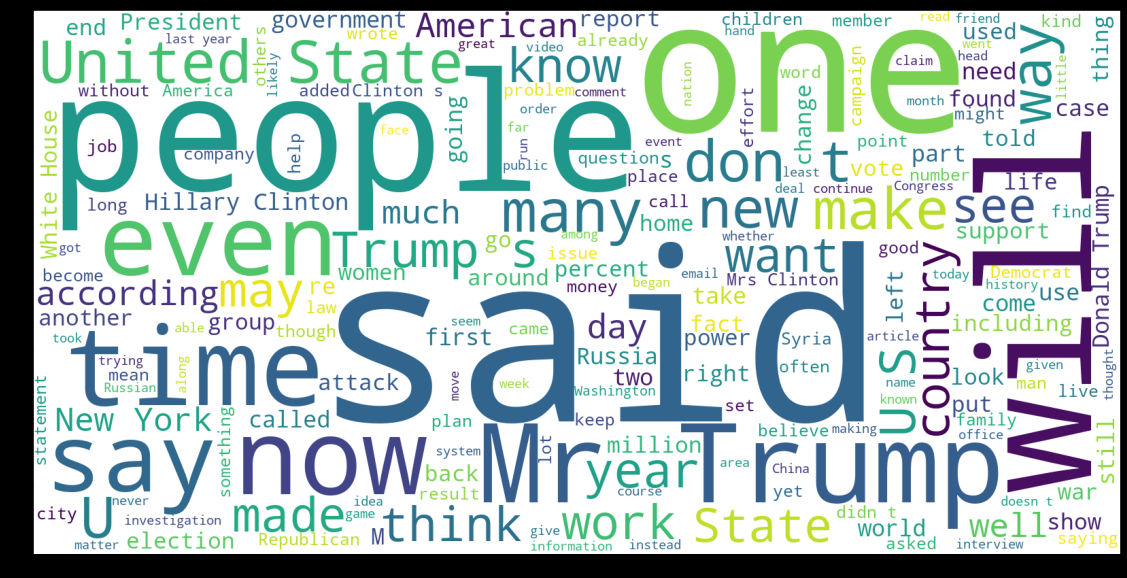

In [68]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(X_cleaned.tolist()))

plt.figure( figsize=(20,10), facecolor='k')

plt.imshow(wordcloud)

# **Prepare data**

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_cleaned)


In [70]:
print(X_vectorized)

  (0, 107658)	0.05260166553816423
  (0, 60661)	0.04989691250253818
  (0, 14042)	0.022705573869897466
  (0, 18079)	0.02603805115995401
  (0, 32021)	0.019929967238503928
  (0, 19596)	0.04164261942953502
  (0, 34274)	0.013159056462781142
  (0, 65719)	0.04289528247101406
  (0, 59112)	0.02859438505471025
  (0, 96404)	0.015493524728095037
  (0, 536)	0.024611769088267996
  (0, 93454)	0.024321973944003074
  (0, 45967)	0.0188363181327804
  (0, 88183)	0.028510528162080488
  (0, 84720)	0.029297083124400422
  (0, 91218)	0.01804717816654877
  (0, 24361)	0.02559083560248644
  (0, 55418)	0.020913781069641514
  (0, 99884)	0.040738718750932774
  (0, 17339)	0.05048209177501534
  (0, 16506)	0.04103776057750554
  (0, 66691)	0.032852181676741615
  (0, 92668)	0.02753820271595884
  (0, 18675)	0.022167523152501294
  (0, 80281)	0.05174343695820427
  :	:
  (20799, 44066)	0.014067495234233025
  (20799, 94488)	0.04039211602715996
  (20799, 33513)	0.052832329687823164
  (20799, 58049)	0.013149167927657673
  (20799

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_vectorized, Y, stratify = Y, test_size = 0.15, random_state = 22)


# **Training**

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [90]:
model.fit( X_train, Y_train)

LogisticRegression()

In [91]:
from sklearn.metrics import accuracy_score

training_prediction = model.predict(X_train)

accuracy = accuracy_score( training_prediction, Y_train)

print("training accuracy is: ", accuracy*100)

training accuracy is:  97.00226244343891


# **Testing**

In [92]:
testing_prediction = model.predict(X_test)

accuracy = accuracy_score( testing_prediction, Y_test)

print("testing accuracy is: ", accuracy*100)

testing accuracy is:  94.42307692307692
